<a href="https://colab.research.google.com/github/reyhanalemmario/bangkit_project/blob/master/DataPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation
This notebook file contains step-by-step process of our data preparation from previous work & additional data preparation by myself for one hot encoding.

In [0]:
#Import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Introduction to the data

In [0]:
# Load the dataset
url = 'https://raw.githubusercontent.com/reyhanalemmario/bangkit/master/cardio.csv'
data = pd.read_csv(url, sep=';', index_col='id')
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


There are 13 columns in this dataset, we are going to examine this columns in more detail. And notice that age column have a huge value, that's because the age unit is in days, we are going to convert that.

In [0]:
# Convert age in days into age in years
data["age"] = data["age"]/365
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [0]:
# Data type and null values information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.9 MB


Every features, but weight has int data type and weight feature has float data type. So, we can continue to analyze this dataset because we have a proper data type. And last thing to notice is we don't have null values in this dataset.

## Manipulating Data
This is the simple version(shortcut) of manipulating data, for the full version you can check from the previous data preparation in Assignment 5.

In [0]:
# Basically we remove the data that have strange values.
data.ap_lo = data.ap_lo[data.ap_lo<300]
data.ap_lo = data.ap_lo[data.ap_lo>50]
data.ap_hi = data.ap_hi[data.ap_hi<300]
data.ap_hi = data.ap_hi[data.ap_hi>50]

In [0]:
# Derive BMI feature

data["height"] = data["height"]/100 # Convert the height unit

data['BMI'] = data["weight"]/data["height"]**2
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,,,
0,50.391781,2,1.68,62.0,110.0,80.0,1,1,0,0,1,0,21.967120
1,55.419178,1,1.56,85.0,140.0,90.0,3,1,0,0,1,1,34.927679
2,51.663014,1,1.65,64.0,130.0,70.0,3,1,0,0,0,1,23.507805
3,48.282192,2,1.69,82.0,150.0,100.0,1,1,0,0,1,1,28.710479
4,47.873973,1,1.56,56.0,100.0,60.0,1,1,0,0,0,0,23.011177


In [0]:
#Filtering the acceptable BMI values
data = data[data["BMI"] <= 70]
data = data[data["BMI"] >= 12]
data.sort_values(["BMI"], ascending=False)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,,,
4838,39.769863,1,1.00,70.0,100.0,70.0,1,1,0,0,1,0,70.000000
52564,53.780822,1,1.61,181.0,180.0,NaN,2,1,0,0,1,1,69.827553
96921,59.624658,1,1.33,123.0,180.0,100.0,2,1,0,0,1,1,69.534739
58175,59.528767,1,1.54,162.0,120.0,80.0,1,1,0,0,1,0,68.308315
27063,42.249315,1,1.55,163.0,180.0,100.0,1,1,0,0,1,1,67.845994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9223,58.136986,1,2.50,86.0,140.0,100.0,3,1,0,0,1,1,13.760000
13518,57.419178,2,1.72,40.0,140.0,90.0,1,2,0,0,1,1,13.520822
54851,59.750685,1,1.54,32.0,110.0,60.0,1,1,0,0,1,0,13.493001


##Create One Hot Encoding and Normalizing Data
I choose cholesterol data because this features has "good" values of correlation to the label from previous data preparation

In [0]:
# One hot Encoding for Cholesterol feature
data = pd.concat([data,pd.get_dummies(data['cholesterol'], prefix='cho')],axis=1)
data.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,cho_1,cho_2,cho_3
id,,,,,,,,,,,,,,,,
0,50.391781,2,1.68,62.0,110.0,80.0,1,1,0,0,1,0,21.967120,1,0,0
1,55.419178,1,1.56,85.0,140.0,90.0,3,1,0,0,1,1,34.927679,0,0,1
2,51.663014,1,1.65,64.0,130.0,70.0,3,1,0,0,0,1,23.507805,0,0,1
3,48.282192,2,1.69,82.0,150.0,100.0,1,1,0,0,1,1,28.710479,1,0,0
4,47.873973,1,1.56,56.0,100.0,60.0,1,1,0,0,0,0,23.011177,1,0,0


In [0]:
#Normalizing Data
data_mean = data.mean()
data_std = data.std()
data_norm = (data - data_mean)/data_std
#Cardio and gender column get affected so we replace that value with pre-normilize value
data_norm = data_norm.drop(columns='cardio')
data_norm = data_norm.drop(columns='gender')
data_norm['gender'] = data['gender']

data_norm['cardio'] = data['cardio']
data_norm.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,cho_1,cho_2,cho_3,gender,cardio
id,,,,,,,,,,,,,,,,
0,-0.436100,0.450721,-0.850372,-0.994522,-0.147543,-0.539362,-0.395777,-0.310874,-0.238361,0.494133,-1.046415,0.579921,-0.397442,-0.360931,2,0
1,0.307652,-1.052051,0.752889,0.760556,0.890884,2.400494,-0.395777,-0.310874,-0.238361,0.494133,1.406572,-1.724348,-0.397442,2.770571,1,1
2,-0.248034,0.075028,-0.710958,0.175530,-1.185969,2.400494,-0.395777,-0.310874,-0.238361,-2.023718,-0.754816,-1.724348,-0.397442,2.770571,1,1
3,-0.748192,0.575952,0.543768,1.345583,1.929310,-0.539362,-0.395777,-0.310874,-0.238361,0.494133,0.229871,0.579921,-0.397442,-0.360931,2,1
4,-0.808584,-1.052051,-1.268614,-1.579548,-2.224395,-0.539362,-0.395777,-0.310874,-0.238361,-2.023718,-0.848811,0.579921,-0.397442,-0.360931,1,0


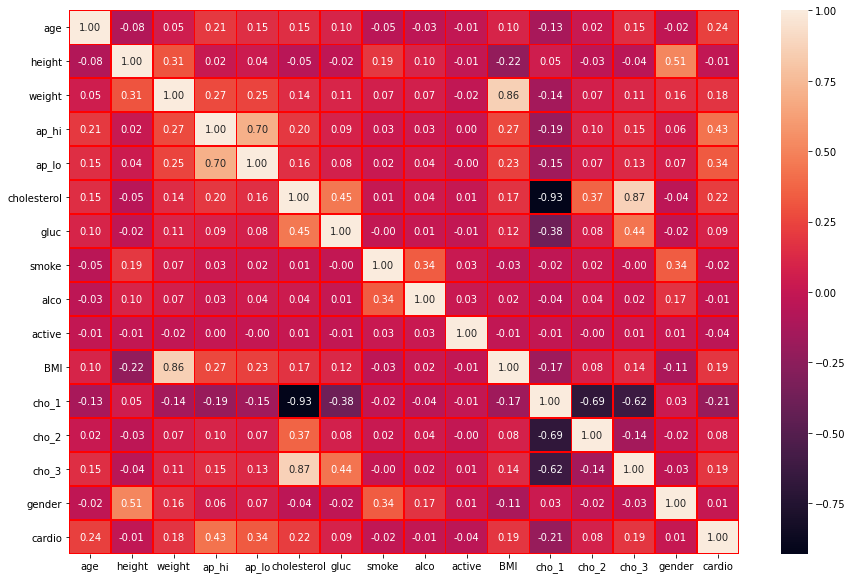

In [0]:
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(data_norm.corr(),annot=True,linewidth=0.5,linecolor='red', fmt = '.2f',ax=ax)
plt.show()

Now, we can use the cholesterol feature through one hot encoding.